In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import pathlib
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [178]:
drive.mount(f'/content/drive/', force_remount=False)

path_to_disk = pathlib.Path(f'/content/drive/My Drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [179]:
df = pd.read_csv(path_to_disk / '/content/drive/MyDrive/Colab Notebooks/Student Performance (Multiple Linear Regression)/Student_Performance.csv')

* Hours Studied — the number of hours the student studied.
* Previous Scores — scores from previous tests.
* Extracurricular Activities — whether the student participates in clubs/sports (Yes/No).
* Sleep Hours — average number of hours of sleep per day.
* Sample Question Papers Practiced — how many practice tests the student completed.









In [180]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [182]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [183]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

In [184]:
# Indicates how intensively the student studied and practiced
df['Study_Intensity'] = df['Hours Studied'] + df['Sample Question Papers Practiced']
# Combination of study and rest, affects learning efficiency
df['Rested_Study'] = df['Hours Studied'] + df['Sleep Hours']
df['Total_Effort_Score'] = df['Hours Studied'] + df['Sample Question Papers Practiced'] + df['Sleep Hours']


In [185]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Study_Intensity,Rested_Study,Total_Effort_Score
0,7,99,1,9,1,91.0,8,16,17
1,4,82,0,4,2,65.0,6,8,10
2,8,51,1,7,2,45.0,10,15,17
3,5,52,1,5,2,36.0,7,10,12
4,7,75,0,8,5,66.0,12,15,20


In [186]:
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
ls = LinearRegression()
ls.fit(x_train, y_train)

LinearRegression()

In [188]:
# Model coefficients
print('Coefficients:', ls.coef_)
print('Intercept:', ls.intercept_)

Coefficients: [ 1.25904873  1.0169882   0.60861668 -0.47465024 -0.61720526  0.64184347
  0.78439849  0.16719323]
Intercept: -33.92194621555668


In [189]:
# Coefficients
print('Коэффициенты:', ls.coef_)
print('Смещение:', ls.intercept_)

Коэффициенты: [ 1.25904873  1.0169882   0.60861668 -0.47465024 -0.61720526  0.64184347
  0.78439849  0.16719323]
Смещение: -33.92194621555668


In [190]:
corr_matrix = df.corr()

# Find pairs of features with strong correlation (absolute correlation > 0.6), ignoring diagonal
strong_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.6:
            strong_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_value))

print("\nPairs of features with strong correlation (> 0.6 or < -0.6):")
for pair in strong_corr:
    print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")



Pairs of features with strong correlation (> 0.6 or < -0.6):
Hours Studied and Study_Intensity: correlation = 0.68
Hours Studied and Rested_Study: correlation = 0.84
Hours Studied and Total_Effort_Score: correlation = 0.62
Previous Scores and Performance Index: correlation = 0.92
Sample Question Papers Practiced and Study_Intensity: correlation = 0.75
Sample Question Papers Practiced and Total_Effort_Score: correlation = 0.69
Study_Intensity and Total_Effort_Score: correlation = 0.92
Rested_Study and Total_Effort_Score: correlation = 0.74


In [191]:
las = Lasso()
las.fit(x_train, y_train)
y_pred_lasso = las.predict(x_test)
print('MSE:', mean_squared_error(y_test, y_pred_lasso))
print('R2:', r2_score(y_test, y_pred_lasso))
print('MAE:', mean_absolute_error(y_test, y_pred_lasso))


MSE: 4.351374550754858
R2: 0.9882580968234168
MAE: 1.657317337915223


In [192]:
std = StandardScaler()
x_train_scaled = std.fit_transform(x_train)
x_test_scaled = std.transform(x_test)

ls_scaled = LinearRegression()
ls_scaled.fit(x_train_scaled, y_train)
y_pred_scaled = ls_scaled.predict(x_test_scaled)
print('MSE:', mean_squared_error(y_test, y_pred_scaled))
print('R2:', r2_score(y_test, y_pred_scaled))
print('MAE:', mean_absolute_error(y_test, y_pred_scaled))

las_scaled = Lasso()
las_scaled.fit(x_train_scaled, y_train)
y_pred_lasso_scaled = las_scaled.predict(x_test_scaled)
print('MSE:', mean_squared_error(y_test, y_pred_lasso_scaled))
print('R2:', r2_score(y_test, y_pred_lasso_scaled))
print('MAE:', mean_absolute_error(y_test, y_pred_lasso_scaled))

rd = Ridge()
rd.fit(x_train_scaled, y_train)
y_pred_ridge = rd.predict(x_test_scaled)
print('MSE:', mean_squared_error(y_test, y_pred_ridge))
print('R2:', r2_score(y_test, y_pred_ridge))
print('MAE:', mean_absolute_error(y_test, y_pred_ridge))


# Linear regression coefficients
print("Linear Regression Coefficients:")
print(ls_scaled.coef_)
print("Offset (intercept):", ls_scaled.intercept_)

# Lasso Regression Coefficients
print("\nLasso Regression Coefficients:")
print(las_scaled.coef_)
print("Bias (intercept):", las_scaled.intercept_)

#Ridge Coefficient
print("\nRidge Regression Coefficients:")
print(rd.coef_)
print("Bias (intercept):", rd.intercept_)



MSE: 4.082628398521855
R2: 0.9889832909573145
MAE: 1.6111213463123046
MSE: 6.743487661615884
R2: 0.9818031340966865
MAE: 2.060421082596097
MSE: 4.083178023061703
R2: 0.9889818078309931
MAE: 1.6112204558082004
Linear Regression Coefficients:
[ 3.66378824 17.63727127  0.30429076 -0.97071797 -1.25006672  1.5245656
  2.5255031   1.00686357]
Offset (intercept): 55.31150000000001

Lasso Regression Coefficients:
[ 5.62065187 16.63112433  0.          0.          0.          0.
  0.74155179  0.26000424]
Bias (intercept): 55.31150000000001

Ridge Regression Coefficients:
[ 3.66346227 17.63505972  0.30426289 -0.97051624 -1.2498529   1.52450543
  2.52534138  1.00688911]
Bias (intercept): 55.31150000000001


<ipython-input-193-266347866321>:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


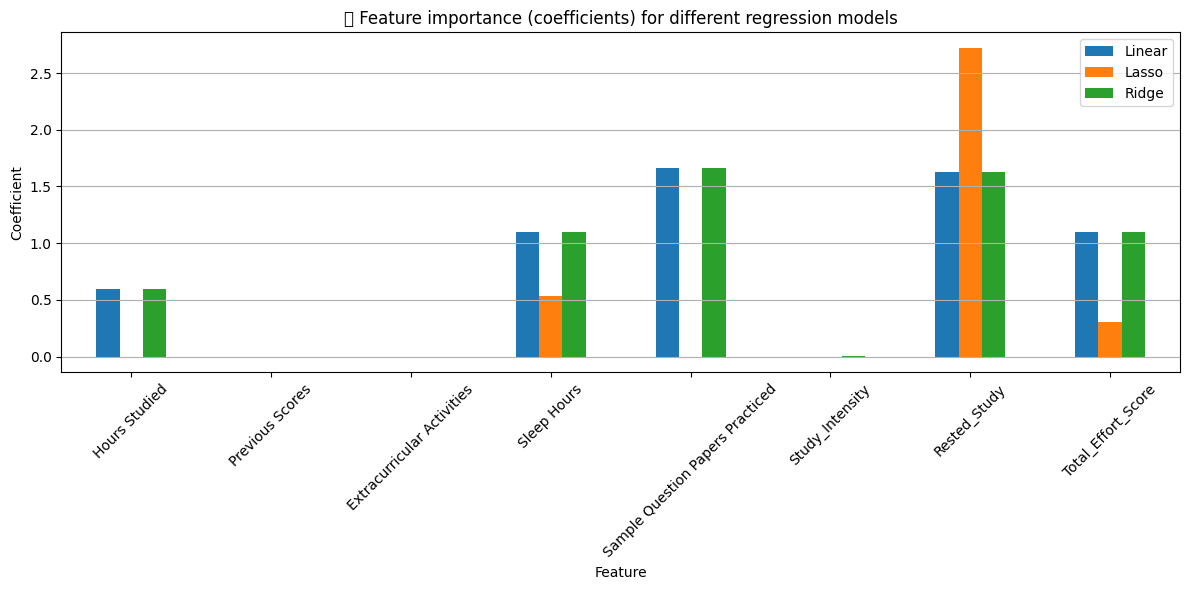

In [193]:
feature_names = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced',
       'Study_Intensity', 'Rested_Study', 'Total_Effort_Score']

# Coefficients from models
linear_coef = [ 5.96332904e-01, 1.33226763e-15, -8.76035355e-17,
                1.09935292e+00, 1.66666841e+00, -1.44328993e-15,
                1.62376251e+00, 1.09740407e+00]

lasso_coef = [0., 0., -0., 0.53664498, 0., 0., 2.72298098, 0.30351683]

ridge_coef = [5.95662111e-01, -3.21806672e-03, -5.82718457e-05,
              1.09936877e+00, 1.66668245e+00, 3.50534836e-03,
              1.62332536e+00, 1.09685332e+00]

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Linear': linear_coef,
    'Lasso': lasso_coef,
    'Ridge': ridge_coef
})

coef_df.set_index('Feature').plot(kind='bar', figsize=(12, 6))
plt.title('📊 Feature importance (coefficients) for different regression models')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


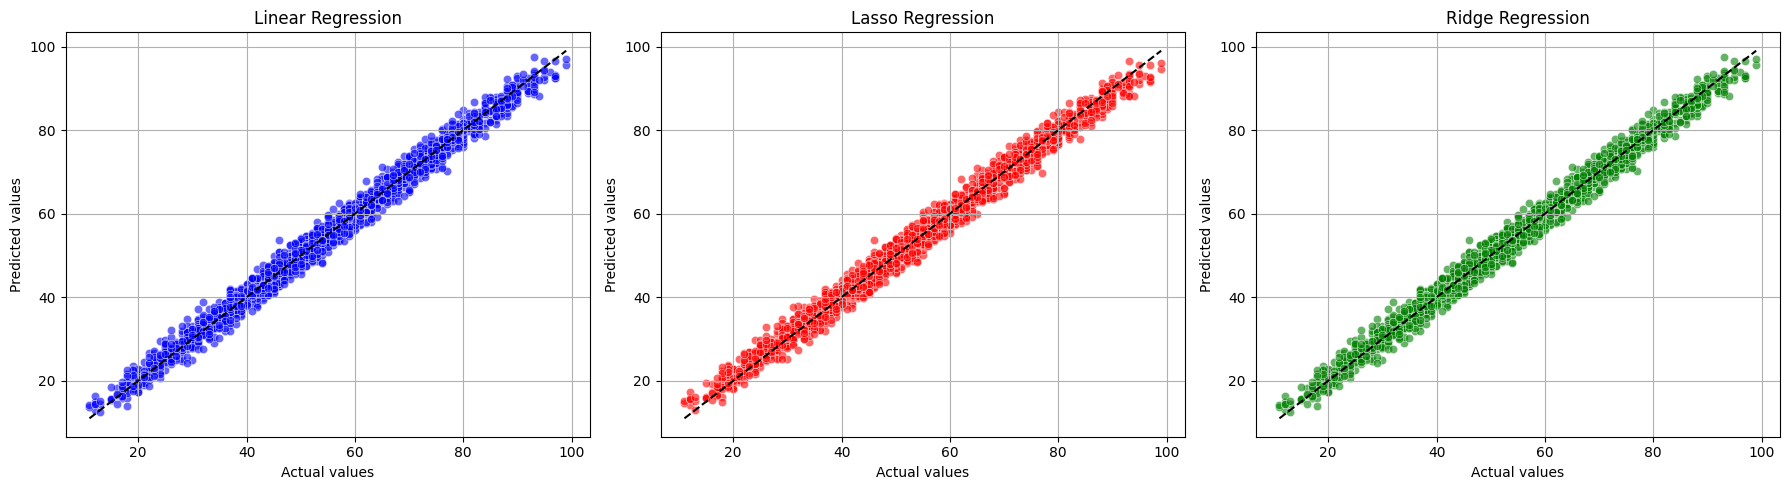

In [194]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 1. Linear Regression
sns.scatterplot(x=y_test, y=y_pred, ax=axs[0], color='blue', alpha=0.6)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[0].set_title('Linear Regression')
axs[0].set_xlabel('Actual values')
axs[0].set_ylabel('Predicted values')
axs[0].grid(True)

# 2. Lasso Regression
sns.scatterplot(x=y_test, y=y_pred_lasso, ax=axs[1], color='red', alpha=0.6)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[1].set_title('Lasso Regression')
axs[1].set_xlabel('Actual values')
axs[1].set_ylabel('Predicted values')
axs[1].grid(True)

# 3. Ridge Regression
sns.scatterplot(x=y_test, y=y_pred_ridge, ax=axs[2], color='green', alpha=0.6)
axs[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[2].set_title('Ridge Regression')
axs[2].set_xlabel('Actual values')
axs[2].set_ylabel('Predicted values')
axs[2].grid(True)

plt.tight_layout()
plt.show()


In [195]:

# Create a pipeline to first scale the features, then train the model
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Grid of values ​​for the alpha parameter (regularization)
param_grid_lasso = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_ridge = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# GridSearch for Lasso
grid_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(x_train, y_train)

print("Лучшее alpha для Lasso:", grid_lasso.best_params_)
print("Лучший MSE (отрицательный):", grid_lasso.best_score_)

# GridSearch for Ridge
grid_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(x_train, y_train)

print("Лучшее alpha для Ridge:", grid_ridge.best_params_)
print("Лучший MSE (отрицательный):", grid_ridge.best_score_)

# Prediction and evaluation on the test with the best models
y_pred_lasso_best = grid_lasso.predict(x_test)
y_pred_ridge_best = grid_ridge.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso_best))
print("Lasso R2:", r2_score(y_test, y_pred_lasso_best))
print("Lasso MAE:", mean_absolute_error(y_test, y_pred_lasso_best))

print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge_best))
print("Ridge R2:", r2_score(y_test, y_pred_ridge_best))
print("Ridge MAE:", mean_absolute_error(y_test, y_pred_ridge_best))


Лучшее alpha для Lasso: {'lasso__alpha': 0.001}
Лучший MSE (отрицательный): -4.178956235695972
Лучшее alpha для Ridge: {'ridge__alpha': 0.001}
Лучший MSE (отрицательный): -4.1789544563025816
Lasso MSE: 4.083000917231221
Lasso R2: 0.9889822857396376
Lasso MAE: 1.611162611282344
Ridge MSE: 4.082628943098202
Ridge R2: 0.9889832894878104
Ridge MAE: 1.6111214431561007


In this code, standardization of features was performed using StandardScaler, after which three linear regression models were trained: regular Linear Regression, Lasso Regression and Ridge Regression. For each model, the main quality metrics were calculated: MSE, R² and MAE. The coefficients of the models and their biases (intercept) were also derived.

* Linear Regression showed good results with a low error and a high determination coefficient.

* Lasso Regression, due to regularization, zeroed out some coefficients, which can help in selecting important features.

* Ridge Regression smoothed the coefficients, while maintaining high quality of predictions.

To improve the quality of the Lasso and Ridge models, the alpha hyperparameter was tuned using GridSearchCV and cross-validation on 5 folds. MSE (Mean Squared Error) was used as the optimization metric.

The best alpha value for both models was 0.001.

After tuning, the models demonstrated high accuracy on the test set:

For Lasso: MSE ≈ 4.08, R² ≈ 0.989, MAE ≈ 1.61

For Ridge: MSE ≈ 4.08, R² ≈ 0.989, MAE ≈ 1.61

This indicates good generalization ability and adequate regularization.

Thus, the use of GridSearchCV allowed us to select the optimal parameters and improve the stability of the model without overfitting.